# 0. 라이브러리 호출

In [67]:
#Pandas 호출
import pandas as pd
#의사결정나무 분류기 호출
from sklearn.tree import DecisionTreeClassifier
#앙상블 기법 랜덤포레스트 호출
from sklearn.ensemble import RandomForestClassifier

# 1. DB 불러오기

In [68]:
#데이터프레임으로 데이터 읽어오기
ld_df = pd.read_csv("final_df.csv", index_col='EMAIL') #인덱스칼럼 EMAIL
#데이터 구조 표시
print(ld_df.shape)
#데이터 미리보기
ld_df.head()

(174, 330)


,min_activity_average_met,max_activity_average_met,mean_activity_average_met,median_activity_average_met,std_activity_average_met,min_activity_cal_active,max_activity_cal_active,mean_activity_cal_active,median_activity_cal_active,std_activity_cal_active,...,Q14_2,Q15,Q16_1,Q16_2,Q16_3,Q17,Q18,Q19,TOTAL,DIAG_NM
EMAIL,,,,,,,,,,,,,,,,,,,,,
nia+003@rowan.kr,1.09375,1.46875,1.262897,1.250000,0.094922,51,531,202.571429,174.0,119.271827,...,2,2,1,2,2,2,2,2,18,MCI
nia+005@rowan.kr,1.21875,1.53125,1.370299,1.375000,0.065236,106,377,217.477876,217.0,51.699112,...,2,2,2,2,2,2,2,2,28,CN
nia+010@rowan.kr,1.28125,1.68750,1.390625,1.390625,0.073000,123,515,259.672414,224.0,82.583164,...,2,2,1,2,2,2,2,2,28,MCI
nia+013@rowan.kr,1.18750,1.90625,1.478484,1.484375,0.154088,94,1121,493.147541,501.5,223.057100,...,2,2,2,2,2,2,2,2,30,MCI
nia+014@rowan.kr,1.25000,1.71875,1.442555,1.437500,0.100065,216,746,401.382353,380.5,123.279576,...,2,2,1,2,2,2,2,2,28,MCI


# 2. 데이터셋에 존재하는 클래스 비율 표시

Text(0.5, 0, '진단결과')

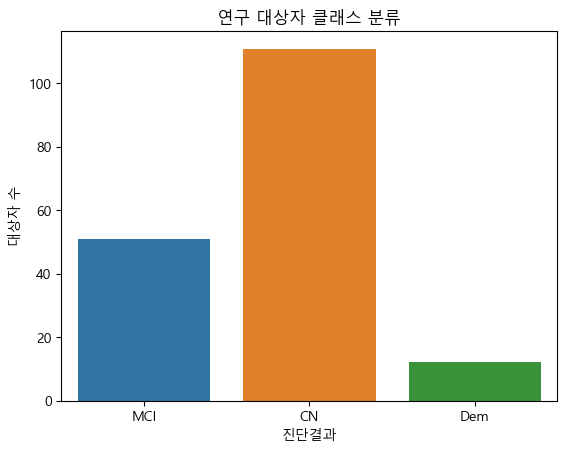

In [69]:
#플롯 라이브러리 호출
import matplotlib.pyplot as plt
import seaborn as sns

#한글 폰트 불러오기
plt.rcParams['font.family'] = 'Malgun Gothic'

#데이터셋 선정
sns.countplot(x=ld_df['DIAG_NM'])
plt.title('연구 대상자 클래스 분류', fontsize=12)
plt.ylabel('대상자 수')
plt.xlabel('진단결과')

## 2-1. Dem 클래스 MCI클래스에 병합

Text(0.5, 1.0, '연구 대상자 클래스 분류')

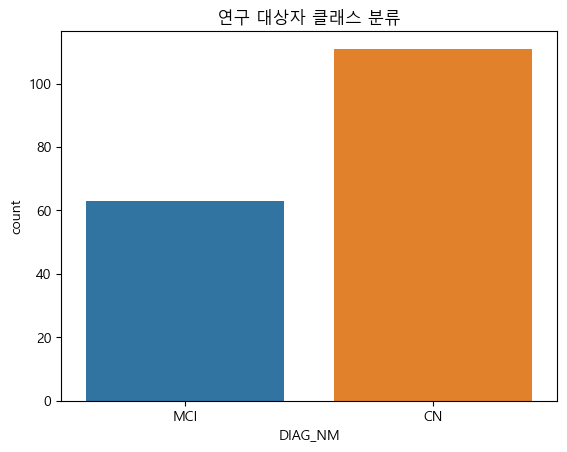

In [70]:
ld_df['DIAG_NM'].replace('Dem', 'MCI', inplace=True)

sns.countplot(x=ld_df['DIAG_NM'])
plt.title('연구 대상자 클래스 분류', fontsize=12)


# 3. 클래스별 비율 고려한 분할

In [71]:
#각 클래스의 비율을 고려해 무작위로 데이터셋 분할
#클래스는 2개이므로 1번 분할, 훈련/테스트 사이즈는 8:2, 무작의 시드값은 0
from sklearn.model_selection import StratifiedShuffleSplit


st_splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=0)

# X값과 Y값 분리
X = ld_df.drop(columns=['DIAG_NM'])
y = ld_df['DIAG_NM']

# 데이터 분할
for train_idx, test_idx in st_splitter.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

----------

# 4. 스케일링 결과 (실제로 X_train, y_train 에는 반영 안함)

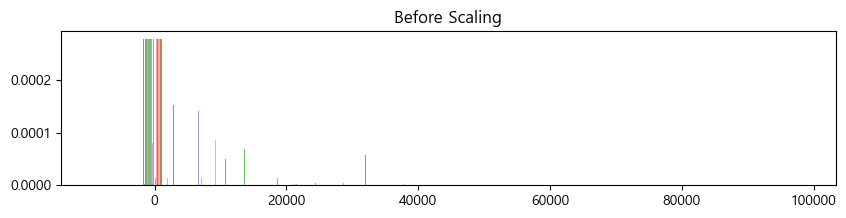

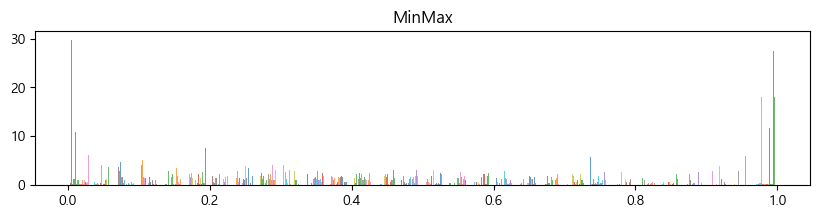

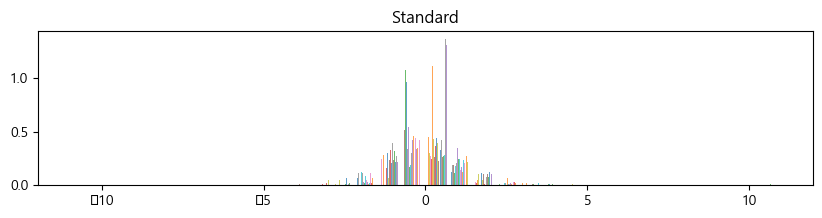

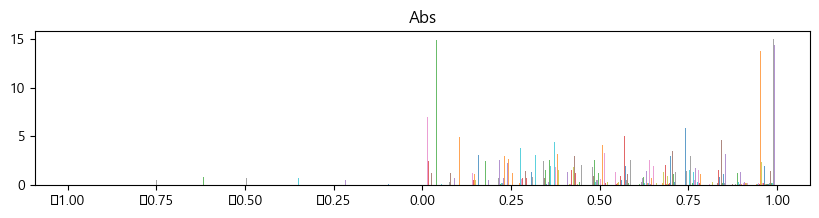

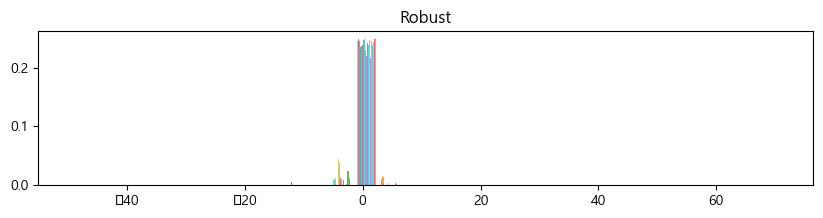

In [72]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, MaxAbsScaler, RobustScaler
import matplotlib.pyplot as plt

#Scaler 객체 생성 딕셔너리 지정
scaler_list = {
    'mm': MinMaxScaler(),
    'std': StandardScaler(),
    'abs': MaxAbsScaler(),
    'rbs': RobustScaler()
}

#스케일링 함수 생성
def scale_data(X_train, scaler):
    X_train_scaled = scaler.fit_transform(X_train)
    return X_train_scaled

#스케일링 진행
scaled_data = {}
for scaler_name, scaler in scaler_list.items():
    #스케일링된 결과 변수에 저장
    X_train_scaled = scale_data(X_train, scaler)
    #리스트에 딕셔너리 형태로 저장
    scaled_data[scaler_name] = {
        'X_train': X_train_scaled
    }


#스케일 이전 상태 plot 로 표시
plt.figure(figsize=(10,2))
plt.hist(X_train, bins=30, alpha = 0.7, density = True)
plt.title('Before Scaling')
plt.show()

#Plot 로 스케일링 결과 표시
plt.figure(figsize=(10,2))
plt.hist(scaled_data['mm']['X_train'], bins=30, alpha = 0.7, density = True)
plt.title('MinMax')
plt.show()

plt.figure(figsize=(10,2))
plt.hist(scaled_data['std']['X_train'], bins=30, alpha = 0.7, density = True)
plt.title('Standard')
plt.show()

plt.figure(figsize=(10,2))
plt.hist(scaled_data['abs']['X_train'], bins=30, alpha = 0.7, density = True)
plt.title('Abs')
plt.show()

plt.figure(figsize=(10,2))
plt.hist(scaled_data['rbs']['X_train'], bins=30, alpha = 0.7, density = True)
plt.title('Robust')
plt.show()

# 6. RandomForest 하이퍼파라미터 최적화 작업

##### 랜덤포레스트 모델을 만들어 엔트로피 값을 기준으로 분류, Cross K-Fold 를 통한 정확도 기준 최적나무개수 도출

### 6-1-1 Parameter : n_estimator 최적화

NV_OS 의 최적트리개수 [75, 80] 
 최적 Accuracy 0.6439999999999999
MM_OS 의 최적트리개수 [45] 
 최적 Accuracy 0.653
STD_OS 의 최적트리개수 [20] 
 최적 Accuracy 0.6113333333333333
ABS_OS 의 최적트리개수 [250] 
 최적 Accuracy 0.6599999999999999
RBS_OS 의 최적트리개수 [105] 
 최적 Accuracy 0.6523333333333333


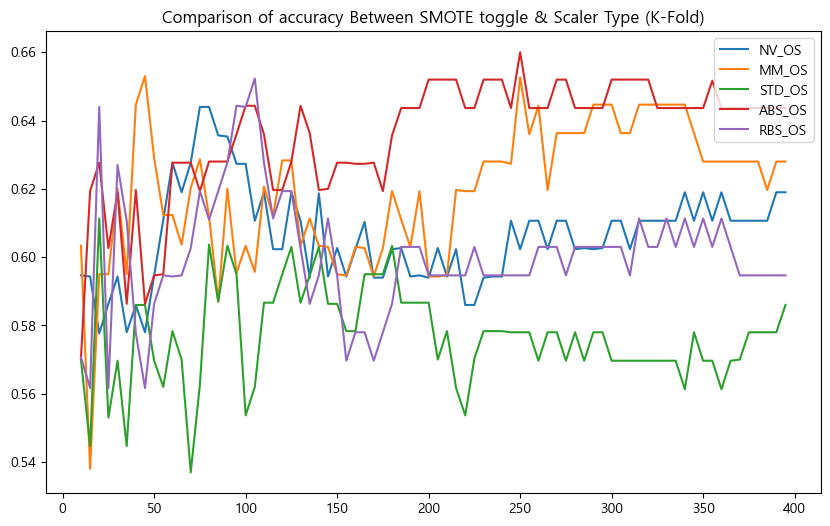

In [73]:
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve
import matplotlib.pyplot as plt_auc
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE



#RF모델 파라미터 스캔 함수

# Stratified K-Fold 생성
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
#SMOTE 생성
smote = SMOTE(sampling_strategy='auto', random_state=0)

#Non-SMOTE 용 테스트

def run_test(X_train, y_train, scaler):

    max_accuracy = 0
    best_n_estimators = list()
    scores = []

    for i in range(10, 400, 5):
            
            # 교차 검증 수행
            scores_fold = []
            for train_index, test_index in kf.split(X_train, y_train):
                X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
                y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]

                # train 폴드에 대한 스케일링
                if scaler != None:
                     X_train_fold = scaler.fit_transform(X_train_fold)
                     X_test_fold = scaler.fit_transform(X_test_fold)

                # 모델 생성 및 적합
                model = RandomForestClassifier(n_estimators=i, random_state=0, n_jobs=-1, criterion='entropy')
                model.fit(X_train_fold, y_train_fold)

                # 모델평가 in 테스트폴드
                y_pred = model.predict(X_test_fold)
                accuracy = accuracy_score(y_test_fold, y_pred)
                scores_fold.append(accuracy)

            # 교차 검증 스코어의 평균을 계산
            acc = np.mean(scores_fold)
            scores.append(acc)
    
            # accuracy 값이 갱신되면 best_n_estimators 갱신
            if acc > max_accuracy:
                max_accuracy = acc
                best_n_estimators.clear()
                best_n_estimators.append(i)
            elif acc == max_accuracy:
                best_n_estimators.append(i)
    return scores, best_n_estimators, max_accuracy

#SMOTE 용 테스트
def run_test_smote(X_train, y_train, scaler):

    max_accuracy = 0
    best_n_estimators = list()
    scores = []

    for i in range(10, 400, 5):

            # 교차 검증 수행
            scores_fold = []
            for train_index, test_index in kf.split(X_train, y_train):
                X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
                y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]

                # train 폴드에 대한 스케일링
                if scaler != None:
                     X_train_fold = scaler.fit_transform(X_train_fold)
                     X_test_fold = scaler.fit_transform(X_test_fold)

                # train 폴드에 대한 오버샘플링
                X_train_fold, y_train_fold = smote.fit_resample(X_train_fold, y_train_fold)

                # 모델 생성 및 적합
                model = RandomForestClassifier(n_estimators=i, random_state=0, n_jobs=-1, criterion='entropy')
                model.fit(X_train_fold, y_train_fold)

                # 모델평가 in 테스트폴드
                y_pred = model.predict(X_test_fold)
                accuracy = accuracy_score(y_test_fold, y_pred)
                scores_fold.append(accuracy)
            # 교차 검증 스코어의 평균을 계산
            acc = np.mean(scores_fold)
            scores.append(acc)
    
            # accuracy 값이 갱신되면 best_n_estimators 갱신
            if acc > max_accuracy:
                max_accuracy = acc
                best_n_estimators.clear()
                best_n_estimators.append(i)
            elif acc == max_accuracy:
                best_n_estimators.append(i)
    return scores, best_n_estimators, max_accuracy


#plot 세팅
plt.figure(figsize=(10, 6))
plt.title('Comparison of accuracy Between SMOTE toggle & Scaler Type (K-Fold)')

# # NV_NM
# scores, best_n_estimators, max_accuracy = run_test(X_train, y_train, None)
# plt.plot(range(10, 400, 5), scores, label = 'NV_NM')
# print("NV_NM",'의 최적트리개수', best_n_estimators, '\n 최적 Accuracy', max_accuracy)

# #MM_NM
# scores, best_n_estimators, max_accuracy = run_test(X_train, y_train, MinMaxScaler())
# plt.plot(range(10, 400, 5), scores, label = 'MM_NM')
# print("MM_NM",'의 최적트리개수', best_n_estimators, '\n 최적 Accuracy', max_accuracy)

# #STD_NM
# scores, best_n_estimators, max_accuracy = run_test(X_train, y_train, StandardScaler())
# plt.plot(range(10, 400, 5), scores, label = 'STD_NM')
# print("STD_NM",'의 최적트리개수', best_n_estimators, '\n 최적 Accuracy', max_accuracy)

# #ABS_NM
# scores, best_n_estimators, max_accuracy = run_test(X_train, y_train, MaxAbsScaler())
# plt.plot(range(10, 400, 5), scores, label = 'ABS_NM')
# print("ABS_NM",'의 최적트리개수', best_n_estimators, '\n 최적 Accuracy', max_accuracy)

# #RBS_NM
# scores, best_n_estimators, max_accuracy = run_test(X_train, y_train, RobustScaler())
# plt.plot(range(10, 400, 5), scores, label = 'RBS_NM')
# print("RBS_NM",'의 최적트리개수', best_n_estimators, '\n 최적 Accuracy', max_accuracy)




#NV_OS
scores, best_n_estimators, max_accuracy = run_test_smote(X_train, y_train, None)
plt.plot(range(10, 400, 5), scores, label = 'NV_OS')
print("NV_OS",'의 최적트리개수', best_n_estimators, '\n 최적 Accuracy', max_accuracy)

#MM_OS
scores, best_n_estimators, max_accuracy = run_test_smote(X_train, y_train, MinMaxScaler())
plt.plot(range(10, 400, 5), scores, label = 'MM_OS')
print("MM_OS",'의 최적트리개수', best_n_estimators, '\n 최적 Accuracy', max_accuracy)

#STD_OS
scores, best_n_estimators, max_accuracy = run_test_smote(X_train, y_train, StandardScaler())
plt.plot(range(10, 400, 5), scores, label = 'STD_OS')
print("STD_OS",'의 최적트리개수', best_n_estimators, '\n 최적 Accuracy', max_accuracy)

#ABS_OS
scores, best_n_estimators, max_accuracy = run_test_smote(X_train, y_train, MaxAbsScaler())
plt.plot(range(10, 400, 5), scores, label = 'ABS_OS')
print("ABS_OS",'의 최적트리개수', best_n_estimators, '\n 최적 Accuracy', max_accuracy)

#RBS_OS
scores, best_n_estimators, max_accuracy = run_test_smote(X_train, y_train, RobustScaler())
plt.plot(range(10, 400, 5), scores, label = 'RBS_OS')
print("RBS_OS",'의 최적트리개수', best_n_estimators, '\n 최적 Accuracy', max_accuracy)

#plot 표시
plt.legend(loc='upper right')

------------

## 7. max_depth 최적 파라미터 탐색

##### 나무 최대 깊이 제한(1~20 탐색)

In [74]:
import warnings 
warnings.filterwarnings('ignore')

NV_OS 의 최적 깊이 :  [4] 
 최적 Accuracy 0.6526666666666666
MM_OS 의 최적 깊이 :  [6] 
 최적 Accuracy 0.662
STD_OS 의 최적 깊이 :  [6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20] 
 최적 Accuracy 0.6113333333333333
ABS_OS 의 최적 깊이 :  [5, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20] 
 최적 Accuracy 0.6599999999999999
RBS_OS 의 최적 깊이 :  [9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20] 
 최적 Accuracy 0.6523333333333333


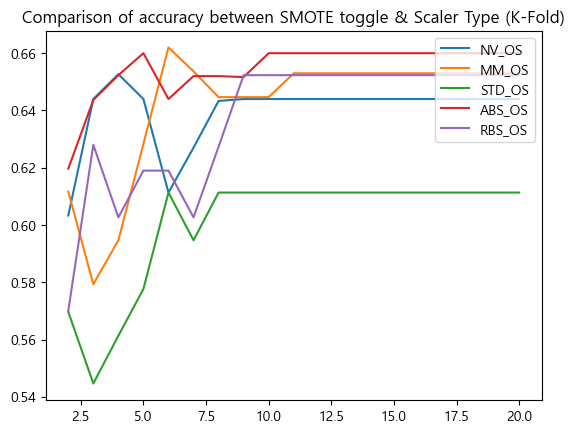

In [75]:
# Stratified K-Fold 생성
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
# SMOTE 생성
smote = SMOTE(sampling_strategy='auto', random_state=0)

def run_test_depth(X_train, y_train, scaler, tree):
    max_f1 = 0 #이건 사실 max_accuracy 임
    best_max_depth = list()
    scores = []
    # 1 ~ 20
    for i in range(2, 21, 1):
            # 교차 검증 수행
            scores_fold = []
            for train_index, test_index in kf.split(X_train, y_train):
                X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
                y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]

                # train 폴드에 대한 스케일링
                if scaler != None:
                     X_train_fold = scaler.fit_transform(X_train_fold)
                     X_test_fold = scaler.fit_transform(X_test_fold)

                # 모델 생성 및 적합
                model = RandomForestClassifier(n_estimators=tree, max_depth=i, random_state=0, n_jobs=-1, criterion='entropy')
                model.fit(X_train_fold, y_train_fold)

                # 모델평가 in 테스트폴드
                y_pred = model.predict(X_test_fold)
                accuracy = accuracy_score(y_test_fold, y_pred)
                scores_fold.append(accuracy)

            # 교차 검증 스코어의 평균을 계산
            acc = np.mean(scores_fold)
            scores.append(acc)

            # accuracy 값이 갱신되면 best_max_depth 갱신
            if acc > max_f1:
                max_f1 = acc
                best_max_depth.clear()
                best_max_depth.append(i)
            elif acc == max_f1:
                best_max_depth.append(i)


    return scores, best_max_depth, max_f1


def run_test_depth_smote(X_train, y_train, scaler, tree):
    max_f1 = 0 #이건 사실 max_accuracy 임
    best_max_depth = list()
    scores = []
    # 1 ~ 20
    for i in range(2, 21, 1):

            # 교차 검증 수행
            scores_fold = []
            for train_index, test_index in kf.split(X_train, y_train):
                X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
                y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]

                # train 폴드에 대한 스케일링
                if scaler != None:
                     X_train_fold = scaler.fit_transform(X_train_fold)
                     X_test_fold = scaler.fit_transform(X_test_fold)

                # train 폴드에 대한 오버샘플링
                X_train_fold, y_train_fold = smote.fit_resample(X_train_fold, y_train_fold)

                # 모델 생성 및 적합
                model = RandomForestClassifier(n_estimators=tree, max_depth=i, random_state=0, n_jobs=-1, criterion='entropy')
                model.fit(X_train_fold, y_train_fold)

                # 모델평가 in 테스트폴드
                y_pred = model.predict(X_test_fold)
                accuracy = accuracy_score(y_test_fold, y_pred)
                scores_fold.append(accuracy)

            # 교차 검증 스코어의 평균을 계산
            acc = np.mean(scores_fold)
            scores.append(acc)

            # accuracy 값이 갱신되면 best_max_depth 갱신
            if acc > max_f1:
                max_f1 = acc
                best_max_depth.clear()
                best_max_depth.append(i)
            elif acc == max_f1:
                best_max_depth.append(i)


    return scores, best_max_depth, max_f1
         

# #NV_NM
# scores, best_max_depth, max_f1 = run_test_depth(X_train, y_train, None, 65)
# plt.plot(range(2, 21), scores, label = 'NV_NM')
# print("NV_NM",'의 최적 깊이 : ', best_max_depth, '\n 최적 Accuracy', max_f1)

# #MM_NM
# scores, best_max_depth, max_f1 = run_test_depth(X_train, y_train, MinMaxScaler(), 190)
# plt.plot(range(2, 21), scores, label = 'MM_NM')
# print("MM_NM",'의 최적 깊이 : ', best_max_depth, '\n 최적 Accuracy', max_f1)


# #STD_NM
# scores, best_max_depth, max_f1 = run_test_depth(X_train, y_train, StandardScaler(), 120)
# plt.plot(range(2, 21), scores, label = 'STD_NM')
# print("STD_NM",'의 최적 깊이 : ', best_max_depth, '\n 최적 Accuracy', max_f1)

# #ABS_NM
# scores, best_max_depth, max_f1 = run_test_depth(X_train, y_train, MaxAbsScaler(), 305)
# plt.plot(range(2, 21), scores, label = 'ABS_NM')
# print("ABS_NM",'의 최적 깊이 : ', best_max_depth, '\n 최적 Accuracy', max_f1)

# #RBS_NM
# scores, best_max_depth, max_f1 = run_test_depth(X_train, y_train, RobustScaler(), 125)
# plt.plot(range(2, 21), scores, label = 'RBS_NM')
# print("RBS_NM",'의 최적 깊이 : ', best_max_depth, '\n 최적 Accuracy', max_f1)



#NV_OS
scores, best_max_depth, max_f1 = run_test_depth_smote(X_train, y_train, None, 75)
plt.plot(range(2, 21), scores, label = 'NV_OS')
print("NV_OS",'의 최적 깊이 : ', best_max_depth, '\n 최적 Accuracy', max_f1)

#MM_OS
scores, best_max_depth, max_f1 = run_test_depth_smote(X_train, y_train, MinMaxScaler(), 45)
plt.plot(range(2, 21), scores, label = 'MM_OS')
print("MM_OS",'의 최적 깊이 : ', best_max_depth, '\n 최적 Accuracy', max_f1)

#STD_OS
scores, best_max_depth, max_f1 = run_test_depth_smote(X_train, y_train, StandardScaler(), 20)
plt.plot(range(2, 21), scores, label = 'STD_OS')
print("STD_OS",'의 최적 깊이 : ', best_max_depth, '\n 최적 Accuracy', max_f1)

#ABS_OS
scores, best_max_depth, max_f1 = run_test_depth_smote(X_train, y_train, MaxAbsScaler(), 250)
plt.plot(range(2, 21), scores, label = 'ABS_OS')
print("ABS_OS",'의 최적 깊이 : ', best_max_depth, '\n 최적 Accuracy', max_f1)

#RBS_OS
scores, best_max_depth, max_f1 = run_test_depth_smote(X_train, y_train, RobustScaler(), 105)
plt.plot(range(2, 21), scores, label = 'RBS_OS')
print("RBS_OS",'의 최적 깊이 : ', best_max_depth, '\n 최적 Accuracy', max_f1)

#제목표시=
plt.title('Comparison of accuracy between SMOTE toggle & Scaler Type (K-Fold)')
#plot 표시
plt.legend(loc='upper right')

----------------------

# 8. GridSearchCV 를 사용한 최적 하이퍼파라미터 탐색

#### 앞의 탐색 과정을 통해 나온 대략적인 하이퍼 파라미터값을 params 에 딕셔너리 형태로 담아 GridSearchCV 를 통해 가장 최적인 하이퍼 파라미터값을 구하기로 하였다.

In [76]:
#파라미터 내 모든 조합 최적의 파라미터 탐색
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, StratifiedShuffleSplit
from sklearn.metrics import classification_report, make_scorer, precision_recall_fscore_support
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, roc_curve
from imblearn.pipeline import Pipeline #파이프라인을 사용하여 교차검증마다 SMOTE 를 적용할 수 있게 함

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

#non-SMOTE 에 대한 그리드서치
def run_grid(X_train, y_train, tree, depth, scaler):

    ###수동
    if scaler != None:
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.fit_transform(X_test)
    else:
        X_train_scaled = X_train
        X_test_scaled = X_test
    
    #파이프라인 생성
    # |          Train fold(SMOTE, Scaler)     | val fold(original) |     test data(나중에 평가 시 사용)     |

    pipeline = Pipeline([
        ('clf', RandomForestClassifier(random_state=0, n_jobs=-1, criterion='entropy'))  # 분류 모델 (Random Forest 예시)
        ])

    #검색 범위 지정
    params ={
    'clf__n_estimators':[tree],
    'clf__max_depth':[depth],
    'clf__max_samples':[0.2, 0.8],
    'clf__max_features':[0.2, 0.8],
    'clf__min_samples_leaf' : list(range(2, 10)),
    'clf__min_samples_split' : list(range(2, 10))
    }
    
    #GridSearchCV 시작
    grid_cv = GridSearchCV(pipeline, param_grid=params, cv=kf, scoring='accuracy')
    grid_cv.fit(X_train_scaled, y_train)

    #교차검증 점수 계산
    print('[여기서부터 교차검증 에 대한 성능지표]')
    print('Best Hyper-Parameter : {}'.format(grid_cv.best_params_))
    print('Best Score(fold) : {:.4f}'.format(grid_cv.best_score_))

    #Test 데이터에 대한 점수 계산
    y_pred_prob =  grid_cv.best_estimator_.predict_proba(X_test_scaled)[:,1]
    y_pred =  grid_cv.best_estimator_.predict(X_test_scaled)

    #최적 모델 저장
    bestestimator = grid_cv.best_estimator_

    #Test 데이터에 대한 성능지표 계산
    print('[Test 데이터에 대한 성능지표]')
    #AUC 그래프
    fpr, tpr, thresholds = roc_curve((y_test == 'MCI').astype(int), y_pred_prob)
    #정확도
    print('정확도 : ', accuracy_score(y_test, y_pred))
    #정밀도
    print('정밀도 : ', precision_score(y_test, y_pred, average='macro'))
    #재현율
    print('재현율 : ',  recall_score(y_test, y_pred, average='macro'))
    #f1-score
    print('f1-score : ',  f1_score(y_test, y_pred, average='macro'))
    #AUC 측정
    print('AUC : ',  metrics.auc(fpr, tpr))

    return fpr, tpr, bestestimator

def run_grid_smote(X_train, y_train, tree, depth, scaler):

    ###수동
    if scaler != None:
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.fit_transform(X_test)
    else:
        X_train_scaled = X_train
        X_test_scaled = X_test

    X_train_scaled_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)
    
    #파이프라인 생성
    # |          Train fold(SMOTE, Scaler)     | val fold(original) |     test data(나중에 평가 시 사용)     |
    pipeline = Pipeline([
        ('clf', RandomForestClassifier(random_state=0, n_jobs=-1, criterion='entropy'))  # SVC 모델
        ])


    #검색 범위 지정
    params ={
    'clf__n_estimators':[tree],
    'clf__max_depth':[depth],
    'clf__max_samples':[0.2, 0.8],
    'clf__max_features':[0.2, 0.8],
    'clf__min_samples_leaf' : list(range(2, 10)),
    'clf__min_samples_split' : list(range(2, 10))
    }

    #GridSearchCV 시작
    grid_cv = GridSearchCV(pipeline, param_grid=params, cv=kf, scoring='accuracy') 
    grid_cv.fit(X_train_scaled_smote, y_train_smote)

    #교차검증 점수 계산
    print('[여기서부터 교차검증 에 대한 성능지표]')
    print('Best Hyper-Parameter : {}'.format(grid_cv.best_params_))
    print('Best Score(fold) : {:.4f}'.format(grid_cv.best_score_)) 

    #Test 데이터에 대한 점수 계산
    y_pred_prob =  grid_cv.best_estimator_.predict_proba(X_test_scaled)[:,1]
    y_pred =  grid_cv.best_estimator_.predict(X_test_scaled)

    #최적 모델 저장
    bestestimator = grid_cv.best_estimator_

    #Test 데이터에 대한 성능지표 계산
    print('[Test 데이터에 대한 성능지표]')
    #AUC 그래프
    fpr, tpr, thresholds = roc_curve((y_test == 'MCI').astype(int), y_pred_prob)
    #정확도
    print('정확도 : ', accuracy_score(y_test, y_pred))
    #정밀도
    print('정밀도 : ', precision_score(y_test, y_pred, average='macro'))
    #재현율
    print('재현율 : ',  recall_score(y_test, y_pred, average='macro'))
    #f1-score
    print('f1-score : ',  f1_score(y_test, y_pred, average='macro'))
    #AUC 측정
    print('AUC : ',  metrics.auc(fpr, tpr))

    return fpr, tpr, bestestimator

NV_OS
[여기서부터 교차검증 에 대한 성능지표]
Best Hyper-Parameter : {'clf__max_depth': 4, 'clf__max_features': 0.2, 'clf__max_samples': 0.8, 'clf__min_samples_leaf': 4, 'clf__min_samples_split': 9, 'clf__n_estimators': 75}
Best Score(fold) : 0.7923
[Test 데이터에 대한 성능지표]
정확도 :  0.7547169811320755
정밀도 :  0.7530487804878049
재현율 :  0.6927244582043344
f1-score :  0.7036559139784946
AUC :  0.7352941176470588
MM_OS
[여기서부터 교차검증 에 대한 성능지표]
Best Hyper-Parameter : {'clf__max_depth': 6, 'clf__max_features': 0.8, 'clf__max_samples': 0.8, 'clf__min_samples_leaf': 4, 'clf__min_samples_split': 2, 'clf__n_estimators': 45}
Best Score(fold) : 0.7794
[Test 데이터에 대한 성능지표]
정확도 :  0.6226415094339622
정밀도 :  0.5754385964912281
재현율 :  0.56656346749226
f1-score :  0.5669934640522876
AUC :  0.6973684210526315
STD_OS
[여기서부터 교차검증 에 대한 성능지표]
Best Hyper-Parameter : {'clf__max_depth': 6, 'clf__max_features': 0.8, 'clf__max_samples': 0.8, 'clf__min_samples_leaf': 8, 'clf__min_samples_split': 2, 'clf__n_estimators': 20}
Best Score(fold) :

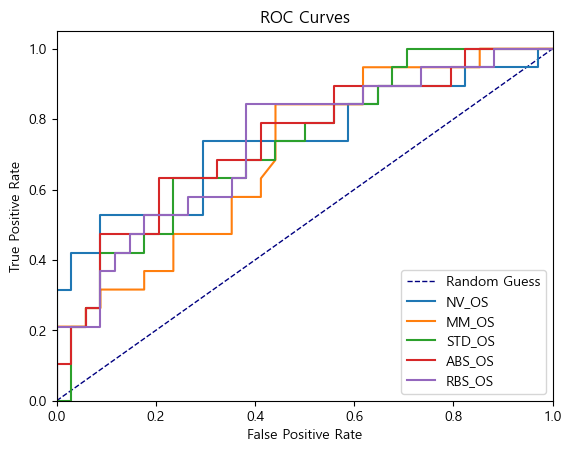

In [77]:
#그래프 설정
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--', label = 'Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')

# #NV_NM
# print("NV_NM")
# fpr, tpr, bestestimator = run_grid(X_train, y_train, 65, 18, None)
# plt.plot(fpr, tpr, '-', ms=2, label="NV_NM")

# #MM_NM
# print("MM_NM")
# fpr, tpr, bestestimator = run_grid(X_train, y_train, 190, 2, MinMaxScaler())
# plt.plot(fpr, tpr, '-', ms=2, label="MM_NM") 

# STD_NM
# print("STD_NM")
# fpr, tp, bestestimator = run_grid(X_train, y_train, 120, 3, StandardScaler())
# plt.plot(fpr, tpr, '-', ms=2, label="STD_NM")

# ABS_NM
# print("ABS_NM")
# fpr, tpr, bestestimator = run_grid(X_train, y_train, 305, 2, MaxAbsScaler())
# plt.plot(fpr, tpr, '-', ms=2, label="ABS_NM")

#RBS_NM
# print("RBS_NM")
# fpr, tpr, bestestimator = run_grid(X_train, y_train, 125, 2, RobustScaler())
# plt.plot(fpr, tpr, '-', ms=2, label="RBS_NM")



# NV_OS
print("NV_OS")
fpr, tpr, bestestimator = run_grid_smote(X_train, y_train, 75, 4, None)
plt.plot(fpr, tpr, '-', ms=2, label="NV_OS")


# #MM_OS
print("MM_OS")
fpr, tpr, bestestimator = run_grid_smote(X_train, y_train, 45, 6, MinMaxScaler())
plt.plot(fpr, tpr, '-', ms=2, label="MM_OS")

# #STD_OS
print("STD_OS")
fpr, tpr, bestestimator = run_grid_smote(X_train, y_train, 20, 6, StandardScaler())
plt.plot(fpr, tpr, '-', ms=2, label="STD_OS")

# #ABS_OS
print("ABS_OS")
fpr, tpr, bestestimator = run_grid_smote(X_train, y_train, 250, 5, MaxAbsScaler())
plt.plot(fpr, tpr, '-', ms=2, label="ABS_OS")

# #RBS_OS
print("RBS_OS")
fpr, tpr, bestestimator = run_grid_smote(X_train, y_train, 105, 9, RobustScaler())
plt.plot(fpr, tpr, '-', ms=2, label="RBS_OS")

#legend 표시
plt.legend(loc='lower right')



# 최종 모델 저장 및 실제 성능 평가

In [78]:
from sklearn.metrics import confusion_matrix

X_train_scaled = X_train
X_test_scaled = X_test

X_train_scaled_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)
bestestimator = RandomForestClassifier(max_samples=0.8, max_features=0.2, n_estimators=75, max_depth=4, min_samples_leaf=4, min_samples_split=9, random_state=0, n_jobs=-1, criterion='entropy')
bestestimator.fit(X_train_scaled_smote, y_train_smote)
#최종 모델 생성

#Classification report
y_pred = bestestimator.predict(X_test_scaled)
report = classification_report(y_test, y_pred, digits=4)
cm = confusion_matrix(y_test, y_pred)
print('오차행렬\n', cm)

#AUC 그래프
y_pred_prob =  bestestimator.predict_proba(X_test_scaled)[:,1]
fpr, tpr, thresholds = roc_curve((y_test == 'MCI').astype(int), y_pred_prob)
#정확도
print('정확도 : ', accuracy_score(y_test, y_pred))
#정밀도
print('정밀도 : ', precision_score(y_test, y_pred, average='macro'))
#재현율
print('재현율 : ',  recall_score(y_test, y_pred, average='macro'))
#f1-score
print('f1-score : ',  f1_score(y_test, y_pred, average='macro'))

print(report)

오차행렬
 [[31  3]
 [10  9]]
정확도 :  0.7547169811320755
정밀도 :  0.7530487804878049
재현율 :  0.6927244582043344
f1-score :  0.7036559139784946
              precision    recall  f1-score   support

          CN     0.7561    0.9118    0.8267        34
         MCI     0.7500    0.4737    0.5806        19

    accuracy                         0.7547        53
   macro avg     0.7530    0.6927    0.7037        53
weighted avg     0.7539    0.7547    0.7385        53



Roc Curves


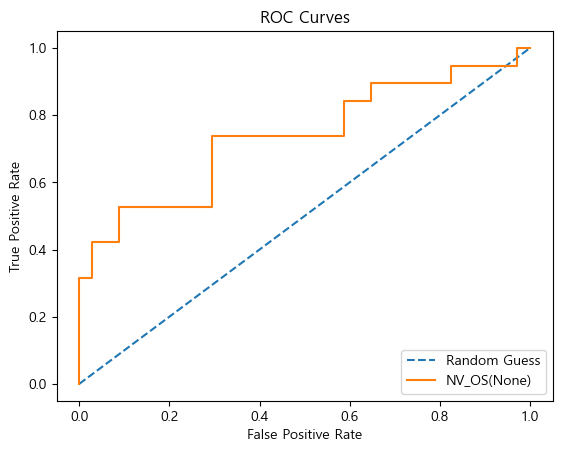

In [79]:
#그래프 설정
plt.plot([0,1],[0,1], '--', label = 'Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')

#모델 하나만 ROC 그래프 그리기
print("Roc Curves")
plt.plot(fpr, tpr, '-', ms=2, label="NV_OS(None)")
plt.legend(loc='lower right')

# 10. 1차 모델에서의 변수 중요도 표시

In [80]:
bestestimator

RandomForestClassifier(criterion='entropy', max_depth=4, max_features=0.2,
                       max_samples=0.8, min_samples_leaf=4, min_samples_split=9,
                       n_estimators=75, n_jobs=-1, random_state=0)

In [81]:
# 파이프라인 섯던거라 파이프라인 명칭 지정해야함
importanceslist = bestestimator.feature_importances_

columnlist = ld_df.drop('DIAG_NM', axis=1).columns.tolist()

#데이터프레임 생성
importance_df = pd.DataFrame({'feature_name': columnlist, 'importance': importanceslist})
importance_df = importance_df.sort_values(by='importance', ascending=False)
importance_df.head(20)

,feature_name,importance
317,Q13_2,0.055762
305,Q09,0.034721
318,Q13_3,0.028416
189,mean_sleep_midpoint_at_delta,0.026428
299,Q03,0.026120
328,TOTAL,0.022741
259,mean_sleep_score_total,0.020875
39,std_activity_low,0.016783
229,mean_sleep_score_alignment,0.016470
186,std_sleep_light,0.015636


#1차모델 SHAP 분석

In [82]:
import shap
explainer = shap.TreeExplainer(bestestimator)
shap_values = explainer.shap_values(X_train_scaled_smote)

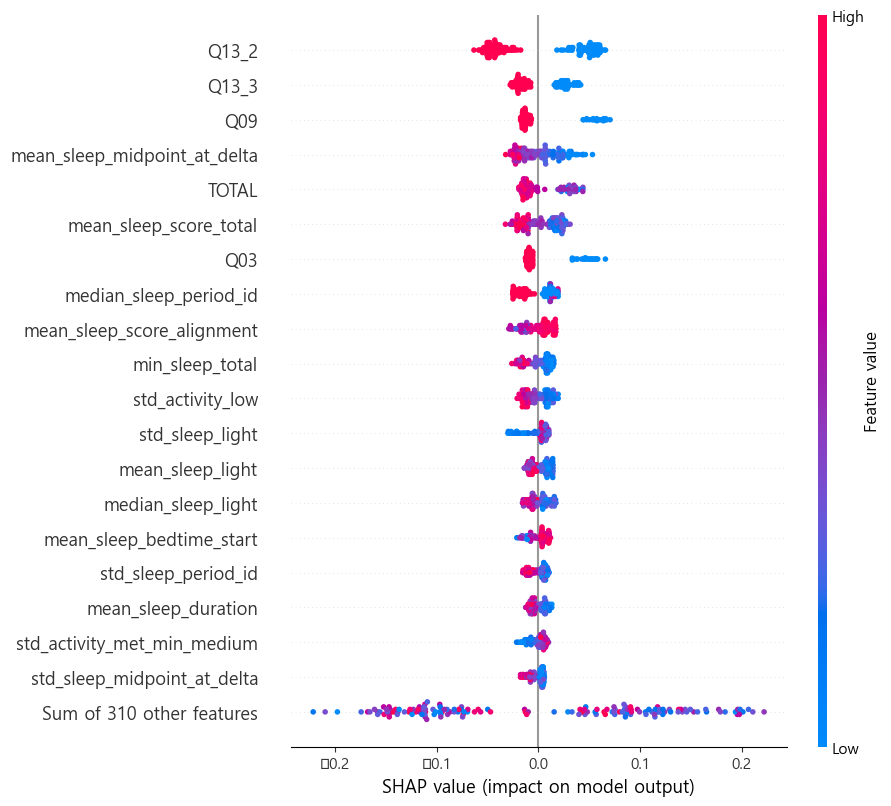

In [83]:
shap_explanation = shap.Explanation(values=shap_values[1], base_values=explainer.expected_value, data=X_train_scaled_smote, feature_names=ld_df.columns)
shap.plots.beeswarm(shap_explanation, max_display=20)

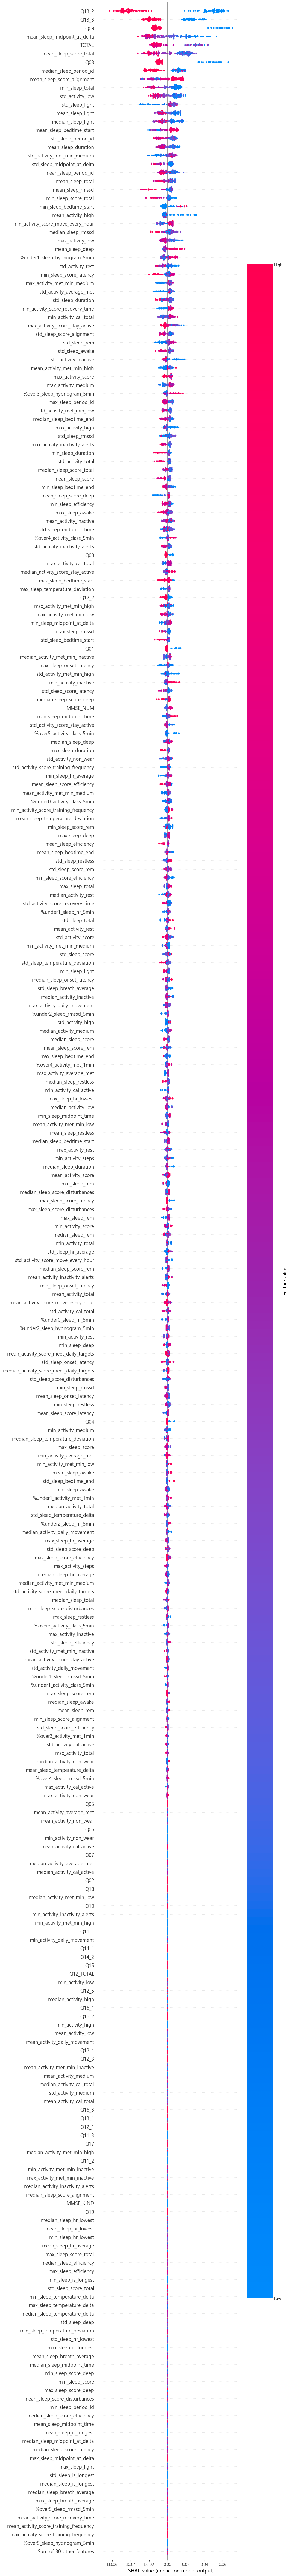

In [84]:
shap.plots.beeswarm(shap_explanation, max_display=300)

# 11. 후진제거법

In [85]:
import matplotlib.pyplot as plt2
import matplotlib.pyplot as rocplot

평가 조건 :
329
Accuracy : 0.7547169811320755
Area Under Curve : 0.73529


평가 조건 :
300
Accuracy : 0.7547169811320755
Area Under Curve : 0.77709
평가 조건 :
270
Accuracy : 0.7735849056603774
Area Under Curve : 0.76161
평가 조건 :
240
Accuracy : 0.7735849056603774
Area Under Curve : 0.78638
평가 조건 :
210
Accuracy : 0.7169811320754716
Area Under Curve : 0.72446
평가 조건 :
180
Accuracy : 0.7547169811320755
Area Under Curve : 0.73220
평가 조건 :
150
Accuracy : 0.7358490566037735
Area Under Curve : 0.78328
평가 조건 :
120
Accuracy : 0.7358490566037735
Area Under Curve : 0.78019
평가 조건 :
90
Accuracy : 0.7169811320754716
Area Under Curve : 0.78947
평가 조건 :
60
Accuracy : 0.7547169811320755
Area Under Curve : 0.76780
모델 출력!
평가 조건 :
30
Accuracy : 0.7924528301886793
Area Under Curve : 0.79721
평가 조건 :
20
Accuracy : 0.7735849056603774
Area Under Curve : 0.75851
평가 조건 :
10
Accuracy : 0.7924528301886793
Area Under Curve : 0.77864
평가 조건 :
5
Accuracy : 0.6415094339622641
Area Under Curve : 0.55573


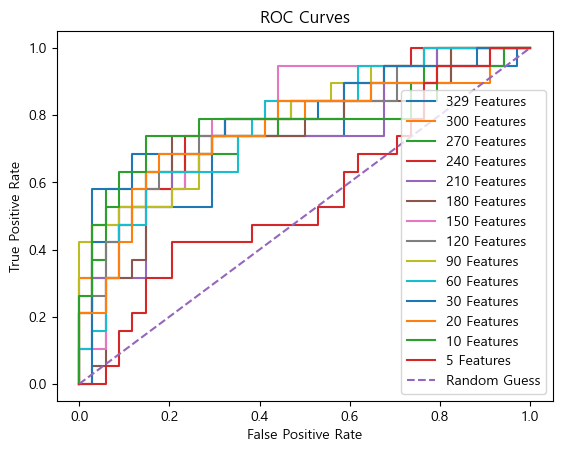

In [86]:
# 후진 제거법 적용
X = ld_df.drop(columns=['DIAG_NM'])
auc = []
acc = []
columcount = []
bestacc = 0
bestcolumcount = 0
final_model = 0
num_of_features = 0

X_train_final = 0
y_train_final = 0
X_test_final = 0

while len(X.columns) > 1:

    for train_idx, test_idx in st_splitter.split(X, y):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    
    X_train_scaled = X_train
    X_test_scaled = X_test

    X_train_scaled_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)
    bestestimator = RandomForestClassifier(max_samples=0.8, max_features=0.2, n_estimators=75, max_depth=4, min_samples_leaf=4, min_samples_split=9, random_state=0, n_jobs=-1, criterion='entropy')
    bestestimator.fit(X_train_scaled_smote, y_train_smote)

    #여기에 최적 모델 뽑기
    if len(X.columns) == 30:
        print('모델 출력!')
        final_model = bestestimator
        X_train_final = X_train_scaled_smote
        y_train_final = y_train_smote
        X_test_final = X_test_scaled
        num_of_features = len(X.columns)
        

    y_pred = bestestimator.predict(X_test_scaled)

    #칼럼길이가 30개 배수거나 329 인 경우만 평가 출력
    if len(X.columns) % 30 == 0  or len(X.columns) == 329 or len(X.columns) == 20 or len(X.columns) == 10 or len(X.columns) == 5:
        #모델 평가
        print("평가 조건 :")
        print(len(X.columns))
        print('Accuracy :', accuracy_score(y_test, y_pred))

        #AUC
        #ROC Curves
        # MCI 를 양성 클래스로 지정하여 ROC Curve 생성
        fpr, tpr, thresholds = roc_curve((y_test == 'MCI').astype(int), bestestimator.predict_proba(X_test_scaled)[:,1])
        #AUC 측정
        roc_auc = metrics.auc(fpr, tpr)
        print('Area Under Curve : %0.5f' % roc_auc)

        #  평가지표 출력
        columcount.append(len(X.columns))
        auc.append(roc_auc)
        acc.append(accuracy_score(y_test, y_pred))

        # roc 커브 출력
        rocplot.plot(fpr, tpr, '-', ms=2, label=str(len(X.columns)) + " Features")

    # 가장 덜 중요한 특성 찾기
    least_important_feature_index = bestestimator.feature_importances_.argmin()
    # 해당 특성 제거
    X = X.drop(X.columns[least_important_feature_index], axis=1)
    y = ld_df['DIAG_NM']



#roc 커브 그래프 표시
rocplot.plot([0,1],[0,1], '--', label = 'Random Guess')
rocplot.xlabel('False Positive Rate')
rocplot.ylabel('True Positive Rate')
rocplot.title('ROC Curves')
rocplot.legend(loc='lower right')

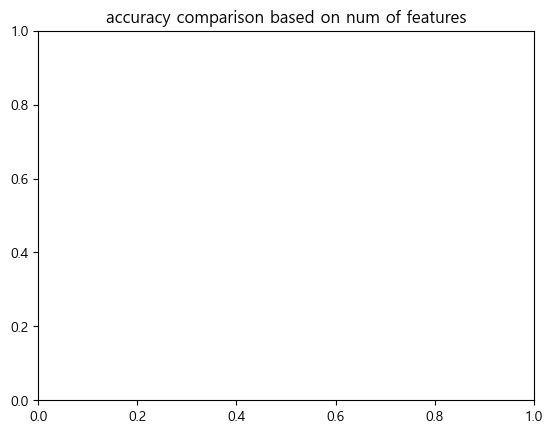

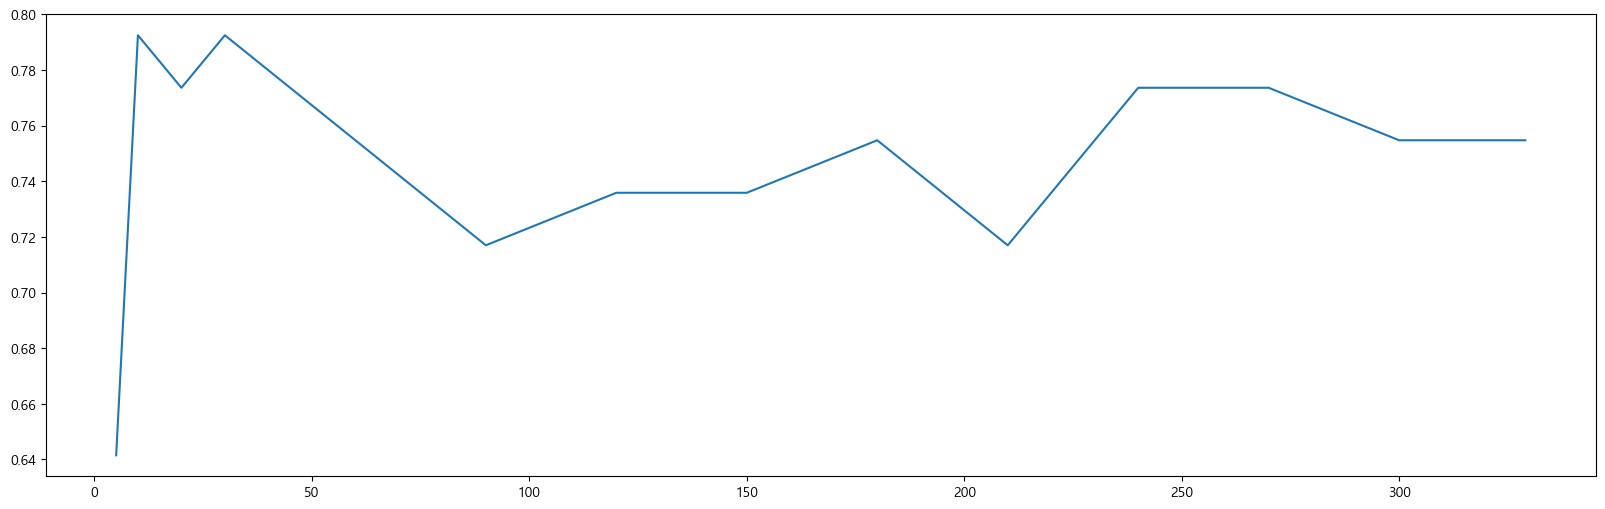

In [87]:
#레전드 표시
plt.title('accuracy comparison based on num of features')
plt.figure(figsize=(20,6))
plt.plot(columcount, acc, '-')

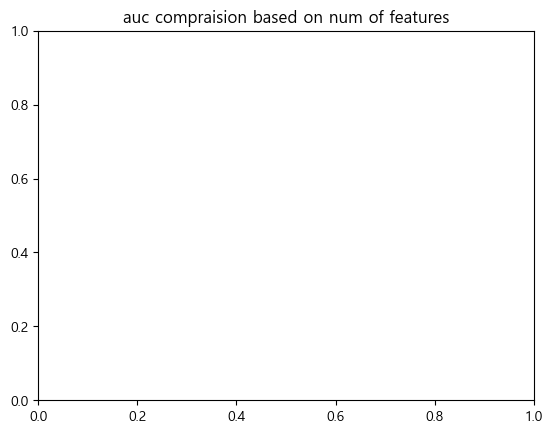

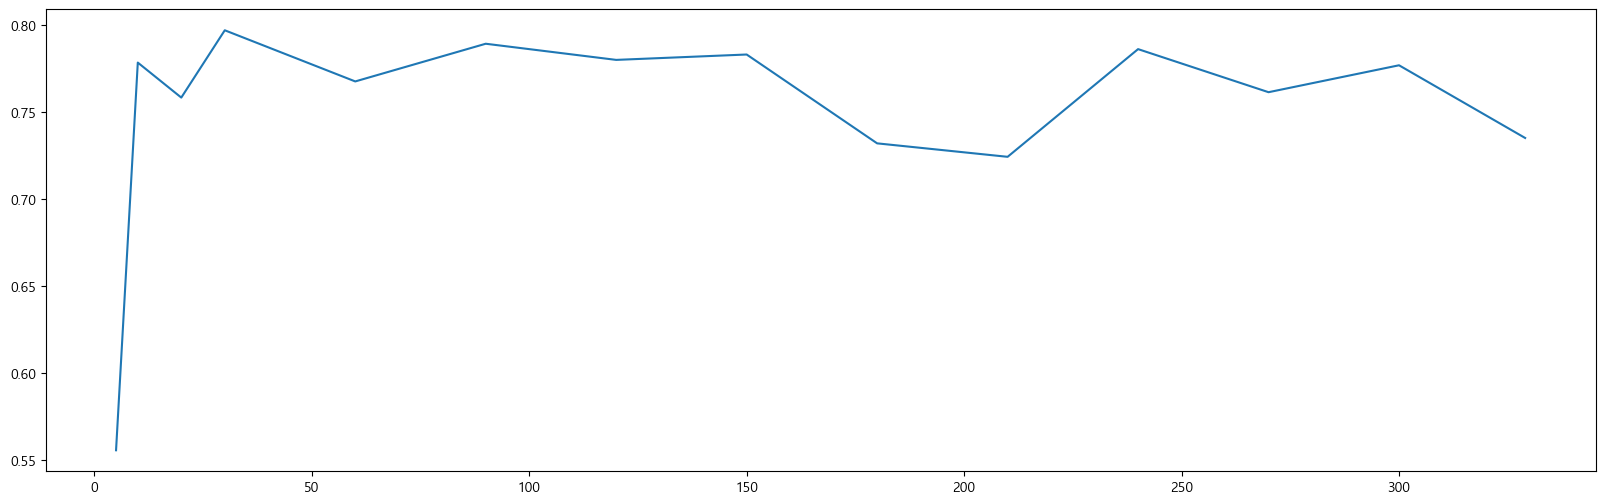

In [88]:
plt2.title('auc compraision based on num of features')
plt2.figure(figsize=(20, 6))
plt2.plot(columcount, auc, '-')

# 12. 2차 모델링

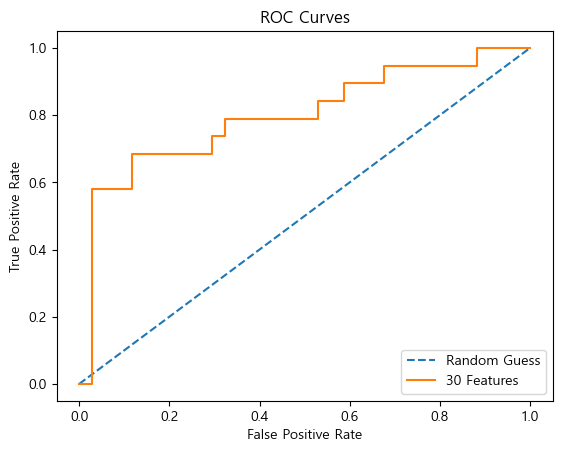

In [89]:
final_model
fpr, tpr, thresholds = roc_curve((y_test == 'MCI').astype(int), final_model.predict_proba(X_test_final)[:,1])
plt.plot([0,1],[0,1], '--', label = 'Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.plot(fpr, tpr, '-', ms=2, label=str(num_of_features) + " Features")
plt.legend(loc='lower right')


In [90]:
#Classification report
y_pred = final_model.predict(X_test_final)
report = classification_report(y_test, y_pred, digits=4)
cm = confusion_matrix(y_test, y_pred)
print('오차행렬\n', cm)
print(report)

오차행렬
 [[30  4]
 [ 7 12]]
              precision    recall  f1-score   support

          CN     0.8108    0.8824    0.8451        34
         MCI     0.7500    0.6316    0.6857        19

    accuracy                         0.7925        53
   macro avg     0.7804    0.7570    0.7654        53
weighted avg     0.7890    0.7925    0.7879        53



#위에가 최종 모델

## 커트한 변수별 2차 모델링 성능 확인

--------------

# 13. 변수중요도 및 SHAP VALUE 분석

-------------

In [91]:
import shap

In [92]:
explainer = shap.TreeExplainer(final_model)
shap_values = explainer.shap_values(X_train_final)

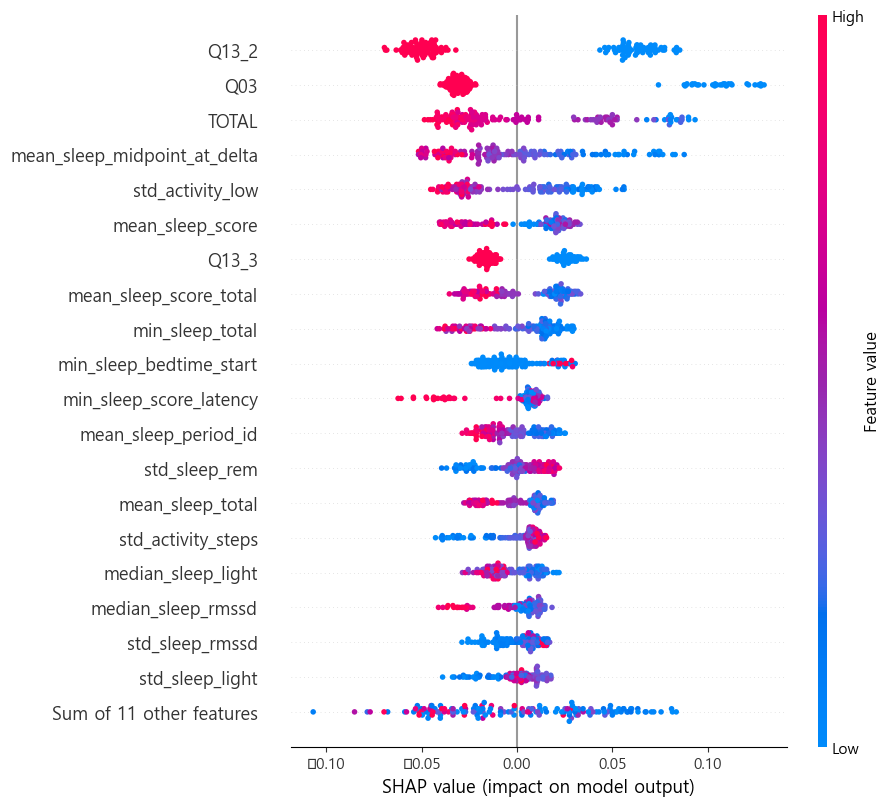

In [93]:
shap_explanation = shap.Explanation(values=shap_values[1], base_values=explainer.expected_value, data=X_train_final, feature_names=X_train_final.columns)
shap.plots.beeswarm(shap_explanation, max_display=20)

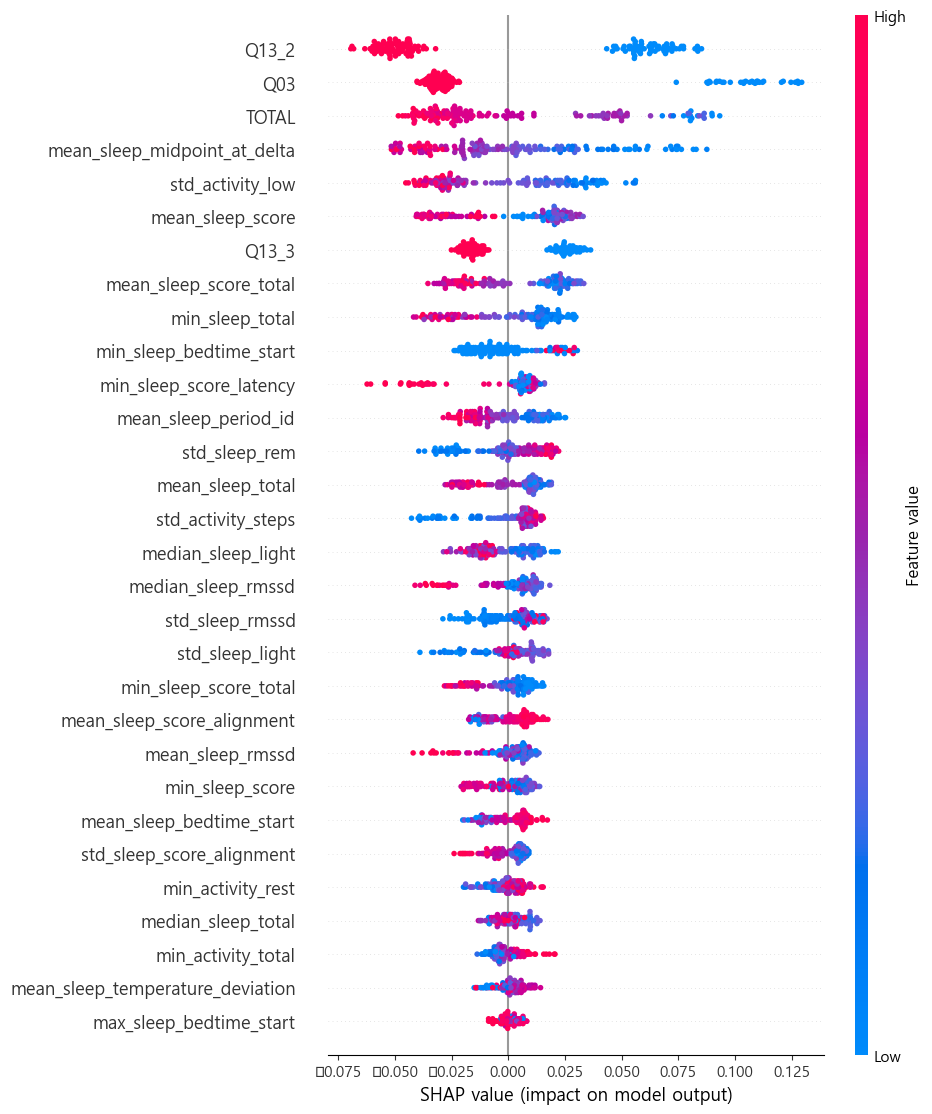

In [94]:
shap_explanation = shap.Explanation(values=shap_values[1], base_values=explainer.expected_value, data=X_train_final, feature_names=X_train_final.columns)
shap.plots.beeswarm(shap_explanation, max_display=300)

---------

## 최종 모델의 변수중요도 상위 10개 변수

-------

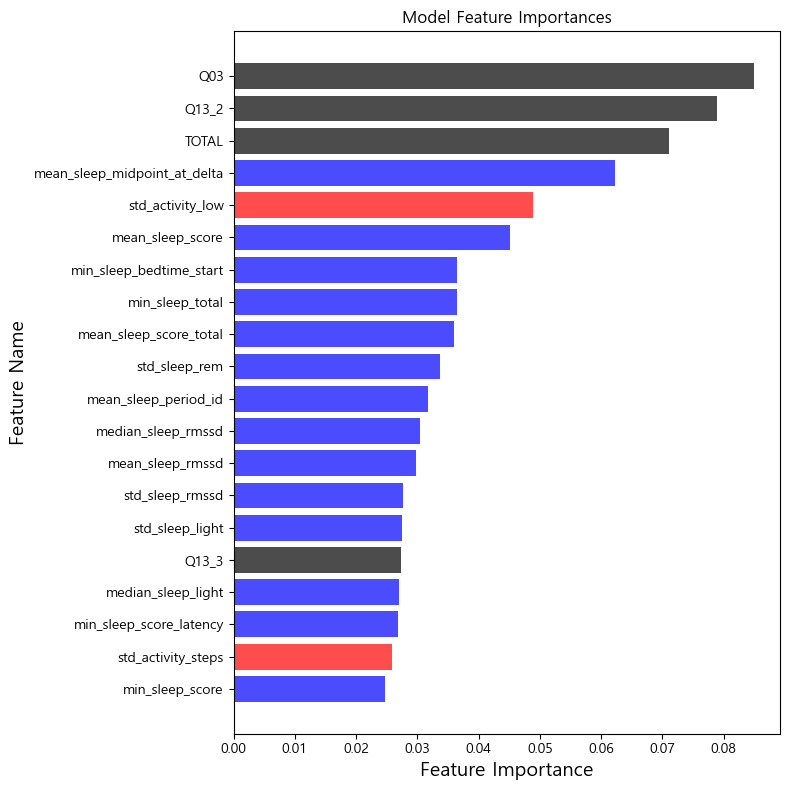

In [95]:
importanceslist = final_model.feature_importances_
columnlist = X_train_final.columns

#데이터프레임 생성
importance_df = pd.DataFrame({'feature_name': columnlist, 'importance': importanceslist})
importance_df = importance_df.sort_values(by='importance', ascending=False)
importance_df.head(20)

# importance_df 데이터프레임을 내림차순으로 정렬
importance_df_sort = importance_df.sort_values(by='importance', ascending=True)
importance_df_sort_top20 = importance_df_sort.tail(20)
plt.figure(figsize=(8, 8))
plt.barh(importance_df_sort_top20['feature_name'], importance_df_sort_top20['importance'], color=['b','r','b','b','k','b','b','b','b','b','b','b','b','b','b','r','b','k','k','k'], alpha=0.7)
plt.xlabel('Feature Importance', fontsize = 14)
plt.ylabel('Feature Name', fontsize = 14)
plt.title('Model Feature Importances')
plt.tight_layout()
plt.show()